In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tqdm
import os
import sys
from IPython.display import Image
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
sns.mpl.style.use('fivethirtyeight')
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2

In [2]:
annos = ["/data/isshamie/genome/ncbi_anno_103/mRNA_alt_CriGri-PICR_top_level.gff3",
"/data/isshamie/genome/picr_final/mRNA_final.gff3"]

names = ["proteo","ncbi"]


In [3]:
dfs = []
for i in annos: 
    dfs.append(pd.read_csv(i,sep="\t",index_col=8,header=None))

In [4]:
for d in dfs:
    for ind in d.index.values:
        curr = ind.split(';')
        for i in curr:
            curr_split = i.split('=')
            (d).at[ind,curr_split[0]] = curr_split[1]

## Distribution of number of genes and isoforms per gene

<IPython.core.display.Javascript object>


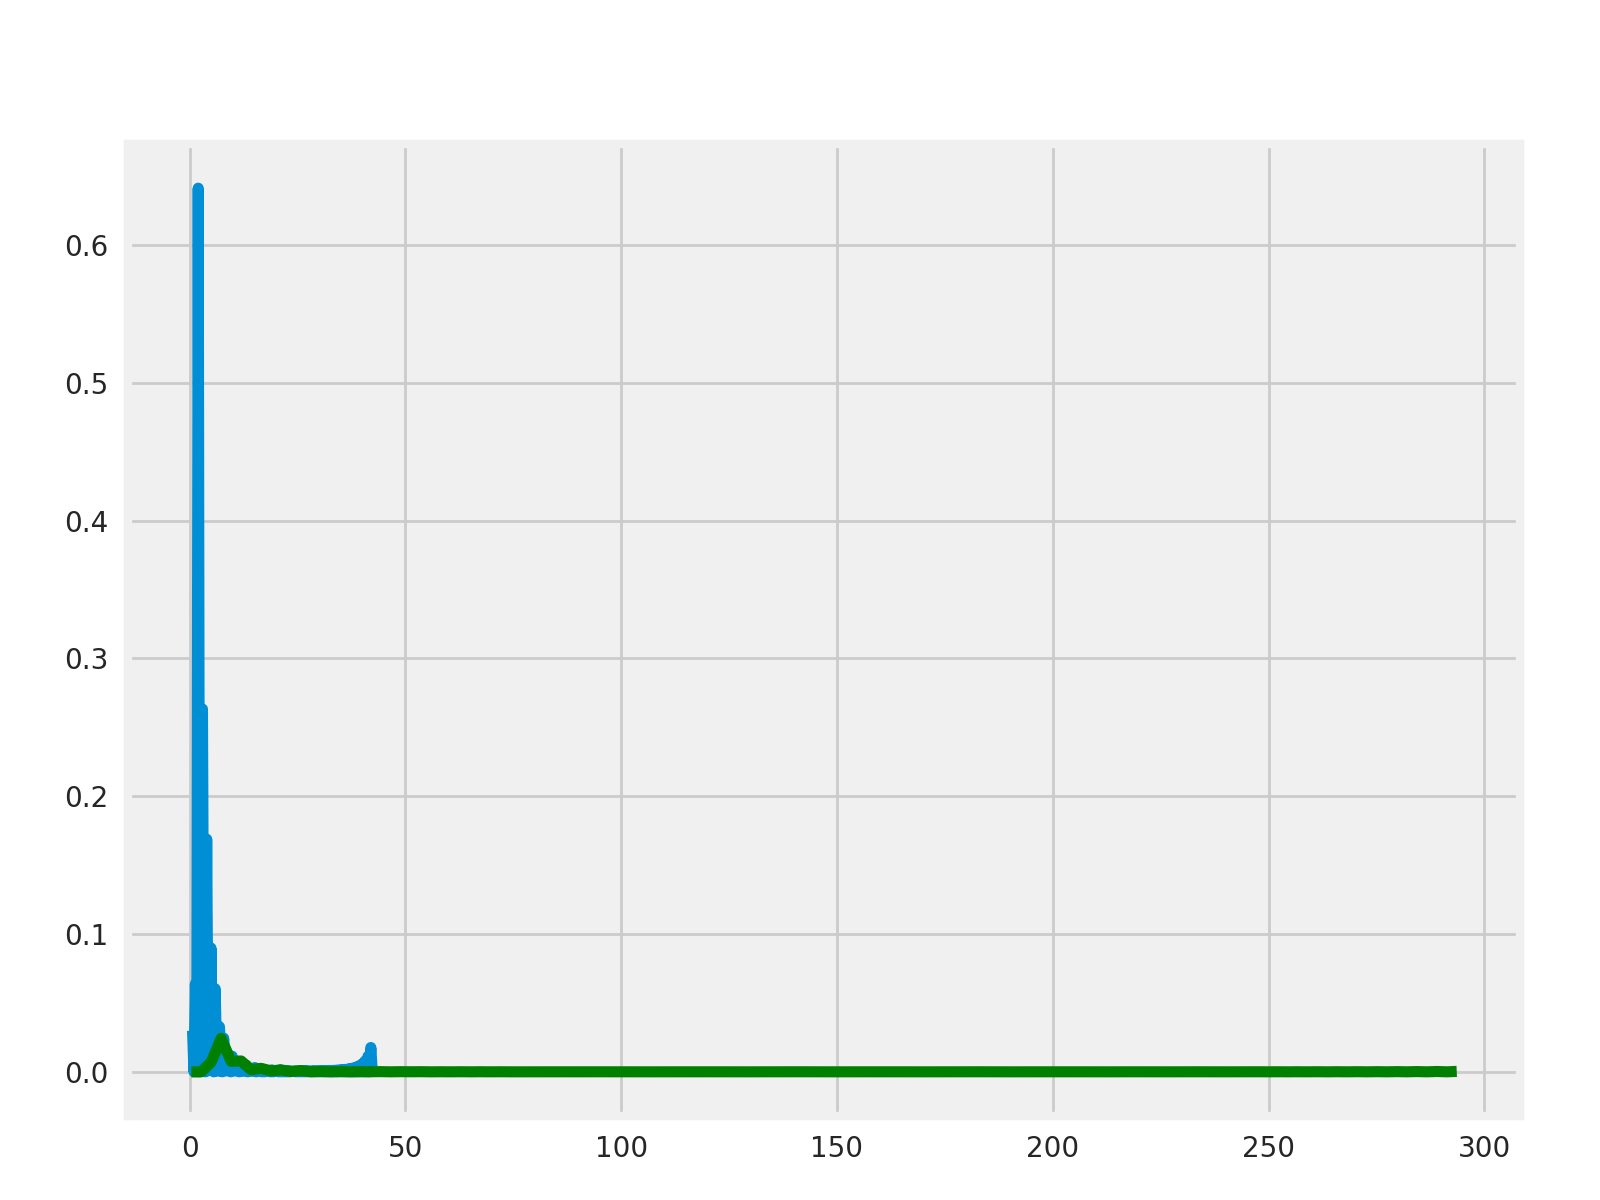

In [5]:
sns.distplot(dfs[0].groupby("gene").size(),hist=False)
sns.distplot(dfs[1].groupby("gene").size(),color="green", hist=False)
#plt.xlim([0,20])
plt.legend(names)